<a href="https://colab.research.google.com/github/saguileran/2022-II-HerrComp/blob/master/PlotEnergies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
# install jscatter as user in the current Jupyter kernel
!{sys.executable} -m pip install jscatter
!{sys.executable} -m pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
#%matplotlib notebook
%matplotlib ipympl

from google.colab import output
output.enable_custom_widget_manager()

In [11]:
import jscatter as js
import matplotlib.pyplot as plt
import os 
import numpy as np

js.usempl(True)  # use matplotlib
#js.usempl(False) # default, use grace on your computer with xmgrace in external window.

Using  mpl


In [7]:
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [34]:
work_directory_AS4 = '/content/drive/MyDrive/MolecularDynamics_2023/USP/AS4/Energies'
work_directory_COL = '/content/drive/MyDrive/MolecularDynamics_2023/USP/COL/Energies'

files = os.listdir(work_directory_AS4)
ligand_files = np.array([file for file in files if 'ligand' in file])
[print(i, ligand_files[i]) for i in range(ligand_files.size)];
ligand_files_interesting = ligand_files[[0,1,3,8,9]]

0 ligand-protein.dat
1 ligand-env.dat
2 ligand-solvent.dat
3 ligand-ARG92.dat
4 ligand-GLN51.dat
5 ligand-ASN45.dat
6 ligand-THR220.dat
7 ligand-HH22.dat
8 ligand-SER118.dat
9 ligand-SER85.dat


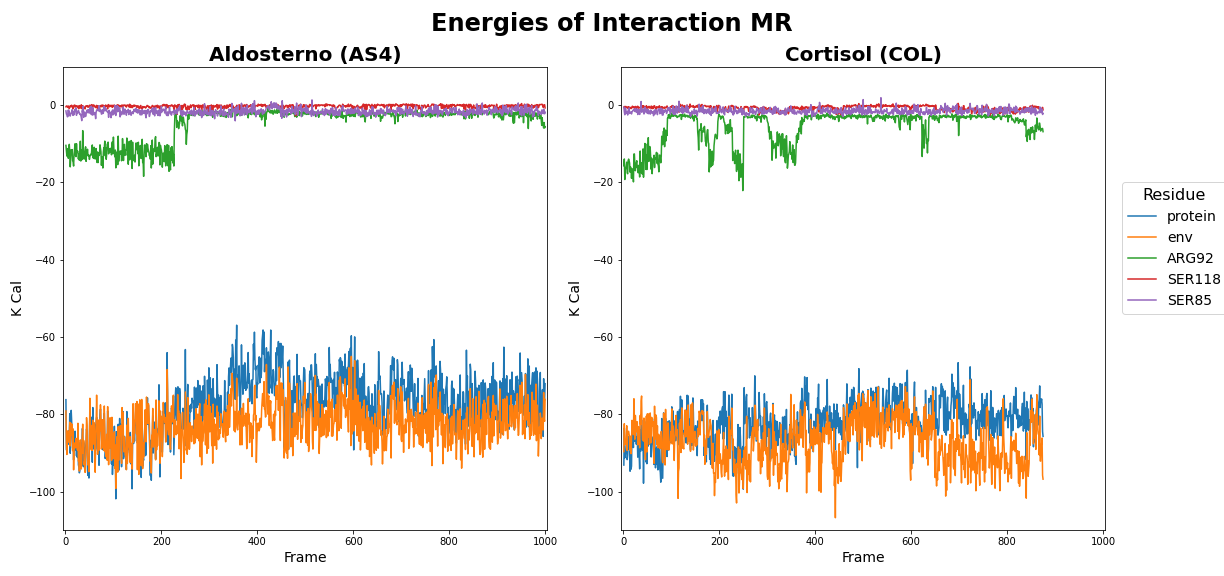

In [53]:
plt.close()
fig, axs = plt.subplots(1,2,figsize=(17,8))

# -------------- aldosterone
for file in ligand_files_interesting:
  data=js.dA(os.path.join(work_directory_AS4, file)) # , ignore='#'
  axs[0].plot(data.X, data.Y + data.eY, label=file[7:-4])

axs[0].set_xlabel('Frame', fontsize='14')
axs[0].set_ylabel('K Cal', fontsize='14')
#legend = 
#axs[0].legend(bbox_to_anchor=(1.15, .75), title='Residue', fontsize='14', title_fontsize='16')#, borderaxespad=0.) # 
#axs[0].setp(legend.get_title(),fontsize='16', fontweight='bold')
#legend.get_title().fontweight('bold')
axs[0].set_title('Aldosterno (AS4)', fontweight='bold', fontsize='20')
axs[0].set_ylim((-110, 10)); axs[0].set_xlim((-5, 1005))

# ------------------ cortisol
for file in ligand_files_interesting:
  data=js.dA(os.path.join(work_directory_COL, file)) # , ignore='#'
  axs[1].plot(data.X, data.Y + data.eY, label=file[7:-4])

axs[1].set_xlabel('Frame', fontsize='14')
axs[1].set_ylabel('K Cal', fontsize='14')
axs[1].legend(bbox_to_anchor=(1.25, .75), title='Residue', fontsize='14', title_fontsize='16', borderaxespad=0.) # 
axs[1].set_title('Cortisol (COL)', fontweight='bold', fontsize='20')
#axs[1].set_ylim((-110, 10)); axs[1].set_xlim((-5, 1005))

axs[1].sharey(axs[0]); axs[1].sharex(axs[0]) # share x and y axis

# axs[1].legend(loc="lower left", ncol=len(ligand_files_interesting), bbox_to_anchor=(0, .0))#bbox_to_anchor=(1.25, .75), title='Residue', fontsize='14', title_fontsize='16')#, borderaxespad=0.) # 
plt.suptitle('Energies of Interaction MR', fontweight='bold', fontsize='24')
fig.tight_layout()
plt.show()

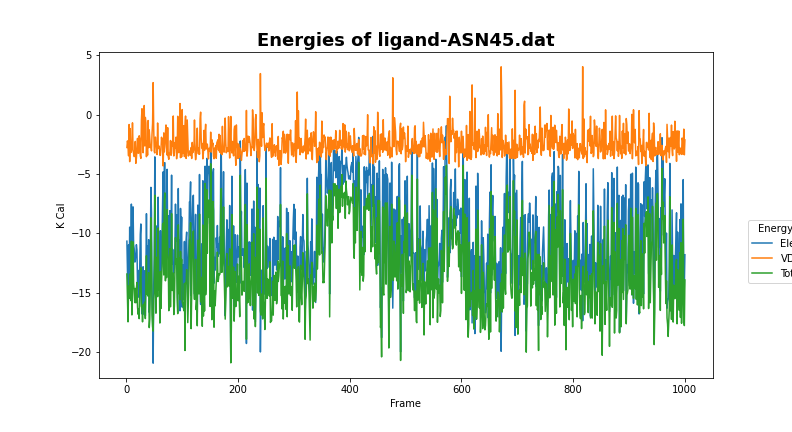

In [23]:
data=js.dA(os.path.join(work_directory_AS4, 'ligand-ASN45.dat'), ignore='#')

plt.figure(figsize=(11,6))
plt.plot(data.X, data.Y, label='Elec')
plt.plot(data.X, data.eY, label="VDW")
plt.plot(data.X, data.Y + data.eY, label='Total')
plt.xlabel('Frame'); plt.ylabel('K Cal')
plt.legend(bbox_to_anchor=(1.05, .5), title='Energy0')
plt.title('Energies of ligand-ASN45.dat', fontweight='bold', fontsize='18')
plt.show()

In [85]:
#help(data)

In [25]:
#p=js.mplot()
#p.plot(data)